In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('IBM.csv')
training_set = dataset.iloc[:1479,1:2].values
testing_set=dataset.iloc[1479:,1:2]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date         1509 non-null object
Open         1509 non-null float64
High         1509 non-null float64
Low          1509 non-null float64
Close        1509 non-null float64
Adj Close    1509 non-null float64
Volume       1509 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
for i in range(60, 1479):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
regressor = Sequential()

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(Dense(units = 1))

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1419/1419 [==============================] - 8s 6ms/step - loss: 0.0455
Epoch 2/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0077
Epoch 3/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0068
Epoch 4/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0064
Epoch 5/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0065
Epoch 6/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0057
Epoch 7/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0068
Epoch 8/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0057
Epoch 9/100
1419/1419 [==============================] - 6s 4ms/step - loss: 0.0057
Epoch 10/100
1419/1419 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 11/100
1419/1419 [==============================] - 7s 5ms/step - loss: 0.0049
Epoch 12/100
1419/1419 [==============================] - 6s 4ms/step - lo

In [15]:
dataset_test = testing_set
real_stock_price = testing_set.values

In [16]:
inputs = dataset.iloc[len(dataset) - len(dataset_test) - 60:,1:2].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,90):
    X_test.append(inputs[i-60:i,0])

In [17]:
len(inputs)

90

In [18]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

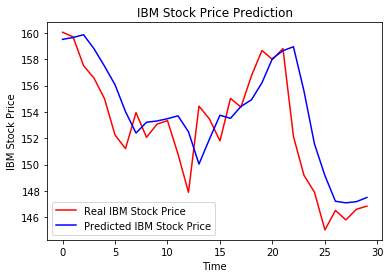

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()